# Basic Model of SDR

Tim Molteno

Some basic models of the components of the super-cheap SDR.

In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy

## The Signal

We'll assume that we're operating in the 6 meter band, so the signal will be a 50 MHz signal modulated using FM, carrying a voice signal that is someone whistling at 10kHz. The signal bandwidth=20kHz

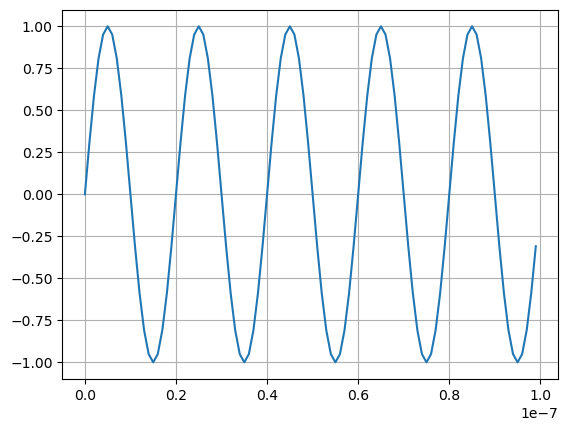

In [76]:
f_sig = 50e6
n_periods = 50000
t_max = n_periods*(1/f_sig)
fs = f_sig*20
t = np.linspace(0, t_max, int(t_max*fs))
omega_voice = 2*np.pi*10e3
omega_f = 2*np.pi*f_sig
bw=20e3 # 20 kHz bandwidth
voice = np.sin(omega_voice*t)
omega = omega_f + voice*bw

signal = np.sin(omega*t)

n = 100
plt.plot(t[0:n], signal[0:n]);
plt.grid(True)

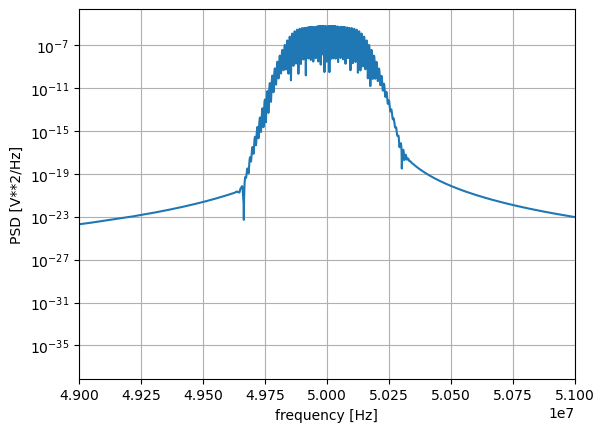

In [77]:
f, Pxx_den = scipy.signal.welch(signal, fs, nperseg=len(signal))

plt.semilogy(f, Pxx_den);
plt.xlabel('frequency [Hz]');
plt.ylabel('PSD [V**2/Hz]');
plt.xlim([49e6, 51e6])
plt.grid()

## The Local Oscillator

This is a frequency synthesizer (MS5351 | https://www.relmon.com/en/index.php/welcome/download/347.html) that can produce a frequency (I and Q) between 2.5 kHz and 200 MHz.

The output is a square wave at logic 3.3V levels. Controlled by I2C.

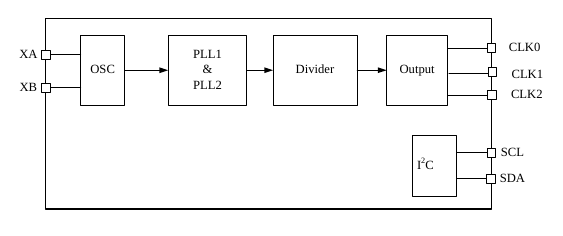

The output is a square wave at the desired frequency, $f_{LO}$. 

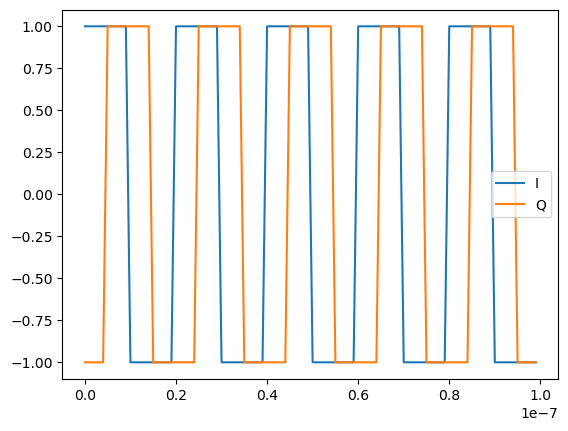

In [78]:

lo_i = scipy.signal.square(2*np.pi*f_LO*t, duty=0.5)
lo_q = scipy.signal.square(2*np.pi*f_LO*t - np.pi/2, duty=0.5)

n = 100
plt.plot(t[0:n], lo_i[0:n], label='I');
plt.plot(t[0:n], lo_q[0:n], label='Q');
plt.legend();

## The mixer

How should this be done. We can use an analogue multiplier, or a switching mixer. We'll try switching. This means that the LO controls a switch (when the LO is HI, the signal gets through, when the LO is LOW, the result is zero)

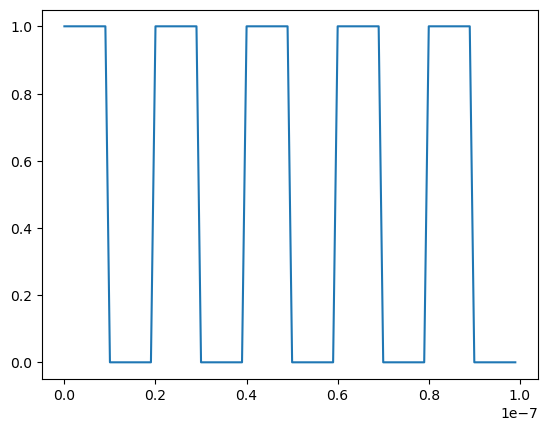

In [83]:
switch_i = lo_i > 0
switch_q = lo_q > 0

plt.plot(t[0:n], switch_i[0:n]);

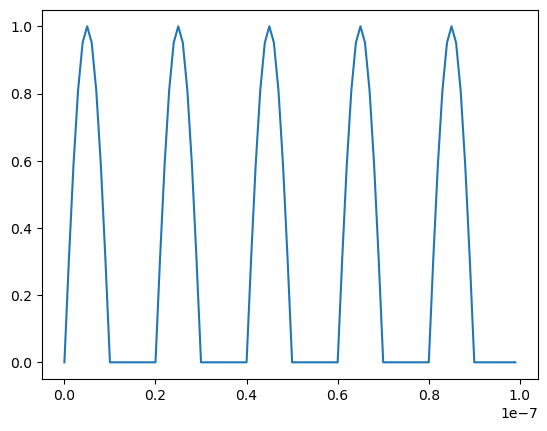

In [86]:
i_out = signal*switch_i
q_out = signal*switch_q

plt.plot(t[0:n], (signal*switch)[0:n]);

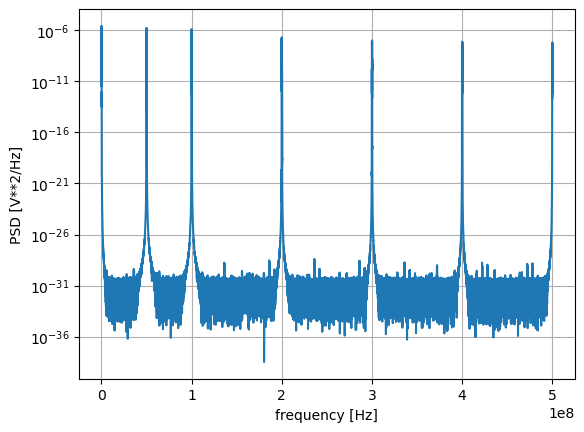

In [88]:
f, Pxx_den = scipy.signal.welch(i_out, fs, nperseg=len(signal))

plt.semilogy(f, Pxx_den);
plt.xlabel('frequency [Hz]');
plt.ylabel('PSD [V**2/Hz]');
plt.grid()

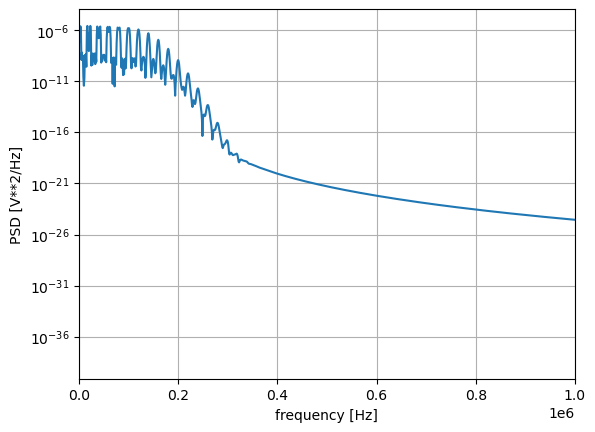

In [89]:
plt.semilogy(f, Pxx_den);
plt.xlabel('frequency [Hz]');
plt.ylabel('PSD [V**2/Hz]');
plt.xlim([0, 1e6])
plt.grid()